## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  88.020058   841.719953  0.208746  7.733169  1.133278
1  29.529699   858.381417  0.864933  2.692450  1.590840
2   0.451501  1633.302623  0.331241  4.424085  1.581433
3  37.381308   213.907561  0.313804  2.418060  1.160078
4  44.059802   934.917778  0.772259  6.515875  1.468138


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.01657 | train_mse: 4.33849 | train_mae: 1.47113 |  0:00:01s


epoch 1  | loss: 0.70139 | train_mse: 3.48905 | train_mae: 1.4175  |  0:00:01s
epoch 2  | loss: 0.62498 | train_mse: 2.42386 | train_mae: 1.16411 |  0:00:01s


epoch 3  | loss: 0.45784 | train_mse: 1.6607  | train_mae: 0.88487 |  0:00:01s


epoch 4  | loss: 0.48499 | train_mse: 1.24522 | train_mae: 0.78091 |  0:00:01s
epoch 5  | loss: 0.43543 | train_mse: 1.12586 | train_mae: 0.77219 |  0:00:01s


epoch 6  | loss: 0.46113 | train_mse: 1.3346  | train_mae: 0.85302 |  0:00:02s
epoch 7  | loss: 0.36453 | train_mse: 1.17949 | train_mae: 0.83794 |  0:00:02s


epoch 8  | loss: 0.34037 | train_mse: 0.97724 | train_mae: 0.73389 |  0:00:02s
epoch 9  | loss: 0.30927 | train_mse: 0.81575 | train_mae: 0.67245 |  0:00:02s
epoch 10 | loss: 0.31203 | train_mse: 0.63432 | train_mae: 0.58451 |  0:00:02s


epoch 11 | loss: 0.24052 | train_mse: 0.4495  | train_mae: 0.51386 |  0:00:02s
epoch 12 | loss: 0.21836 | train_mse: 0.46594 | train_mae: 0.52241 |  0:00:02s
epoch 13 | loss: 0.22393 | train_mse: 0.47933 | train_mae: 0.53284 |  0:00:02s


epoch 14 | loss: 0.34405 | train_mse: 0.63707 | train_mae: 0.57999 |  0:00:02s
epoch 15 | loss: 0.28224 | train_mse: 0.4908  | train_mae: 0.52596 |  0:00:02s


epoch 16 | loss: 0.39858 | train_mse: 0.36131 | train_mae: 0.46812 |  0:00:03s
epoch 17 | loss: 0.27358 | train_mse: 0.30788 | train_mae: 0.42833 |  0:00:03s


epoch 18 | loss: 0.4131  | train_mse: 0.35208 | train_mae: 0.42769 |  0:00:03s
epoch 19 | loss: 0.27222 | train_mse: 0.34951 | train_mae: 0.417   |  0:00:03s


epoch 20 | loss: 0.33468 | train_mse: 0.33459 | train_mae: 0.407   |  0:00:03s
epoch 21 | loss: 0.29718 | train_mse: 0.29005 | train_mae: 0.38219 |  0:00:03s


epoch 22 | loss: 0.2855  | train_mse: 0.28425 | train_mae: 0.38244 |  0:00:03s
epoch 23 | loss: 0.35257 | train_mse: 0.29984 | train_mae: 0.39795 |  0:00:03s
epoch 24 | loss: 0.22498 | train_mse: 0.31868 | train_mae: 0.41186 |  0:00:04s


epoch 25 | loss: 0.27152 | train_mse: 0.33979 | train_mae: 0.41901 |  0:00:04s
epoch 26 | loss: 0.37591 | train_mse: 0.33408 | train_mae: 0.41352 |  0:00:04s
epoch 27 | loss: 0.23138 | train_mse: 0.32563 | train_mae: 0.39928 |  0:00:04s


epoch 28 | loss: 0.20983 | train_mse: 0.26854 | train_mae: 0.37785 |  0:00:04s
epoch 29 | loss: 0.23751 | train_mse: 0.20539 | train_mae: 0.35042 |  0:00:04s


epoch 30 | loss: 0.15788 | train_mse: 0.19992 | train_mae: 0.34879 |  0:00:04s
epoch 31 | loss: 0.19721 | train_mse: 0.18895 | train_mae: 0.33563 |  0:00:04s


epoch 32 | loss: 0.32598 | train_mse: 0.19507 | train_mae: 0.33386 |  0:00:05s
epoch 33 | loss: 0.3555  | train_mse: 0.19028 | train_mae: 0.32368 |  0:00:05s
epoch 34 | loss: 0.21954 | train_mse: 0.20767 | train_mae: 0.33026 |  0:00:05s


epoch 35 | loss: 0.22638 | train_mse: 0.1899  | train_mae: 0.32207 |  0:00:05s
epoch 36 | loss: 0.24129 | train_mse: 0.15107 | train_mae: 0.29145 |  0:00:05s
epoch 37 | loss: 0.16149 | train_mse: 0.15116 | train_mae: 0.28651 |  0:00:05s


epoch 38 | loss: 0.19676 | train_mse: 0.17581 | train_mae: 0.30936 |  0:00:05s
epoch 39 | loss: 0.2614  | train_mse: 0.21267 | train_mae: 0.34602 |  0:00:05s
epoch 40 | loss: 0.19389 | train_mse: 0.22809 | train_mae: 0.35648 |  0:00:05s


epoch 41 | loss: 0.22718 | train_mse: 0.21892 | train_mae: 0.34402 |  0:00:05s
epoch 42 | loss: 0.2468  | train_mse: 0.17215 | train_mae: 0.29922 |  0:00:05s
epoch 43 | loss: 0.27415 | train_mse: 0.14937 | train_mae: 0.28495 |  0:00:05s


epoch 44 | loss: 0.19924 | train_mse: 0.17528 | train_mae: 0.31336 |  0:00:06s
epoch 45 | loss: 0.18653 | train_mse: 0.16145 | train_mae: 0.30144 |  0:00:06s
epoch 46 | loss: 0.23968 | train_mse: 0.15361 | train_mae: 0.28951 |  0:00:06s


epoch 47 | loss: 0.13805 | train_mse: 0.16074 | train_mae: 0.29728 |  0:00:06s
epoch 48 | loss: 0.1985  | train_mse: 0.13251 | train_mae: 0.27585 |  0:00:06s
epoch 49 | loss: 0.2577  | train_mse: 0.11536 | train_mae: 0.26593 |  0:00:06s


epoch 50 | loss: 0.17284 | train_mse: 0.09406 | train_mae: 0.24468 |  0:00:06s
epoch 51 | loss: 0.18503 | train_mse: 0.10336 | train_mae: 0.24903 |  0:00:06s
epoch 52 | loss: 0.14967 | train_mse: 0.13215 | train_mae: 0.28041 |  0:00:06s


epoch 53 | loss: 0.18518 | train_mse: 0.13104 | train_mae: 0.27217 |  0:00:06s
epoch 54 | loss: 0.16863 | train_mse: 0.14405 | train_mae: 0.29018 |  0:00:06s
epoch 55 | loss: 0.14131 | train_mse: 0.12958 | train_mae: 0.27669 |  0:00:06s


epoch 56 | loss: 0.14035 | train_mse: 0.10958 | train_mae: 0.24794 |  0:00:06s
epoch 57 | loss: 0.13114 | train_mse: 0.10417 | train_mae: 0.23897 |  0:00:07s
epoch 58 | loss: 0.15375 | train_mse: 0.09897 | train_mae: 0.22739 |  0:00:07s


epoch 59 | loss: 0.17013 | train_mse: 0.1046  | train_mae: 0.23834 |  0:00:07s
epoch 60 | loss: 0.18712 | train_mse: 0.10243 | train_mae: 0.2425  |  0:00:07s
epoch 61 | loss: 0.1107  | train_mse: 0.0975  | train_mae: 0.25161 |  0:00:07s


epoch 62 | loss: 0.16246 | train_mse: 0.12919 | train_mae: 0.27843 |  0:00:07s
epoch 63 | loss: 0.27257 | train_mse: 0.11568 | train_mae: 0.2658  |  0:00:07s
epoch 64 | loss: 0.13701 | train_mse: 0.08844 | train_mae: 0.23569 |  0:00:07s


epoch 65 | loss: 0.17977 | train_mse: 0.11116 | train_mae: 0.25812 |  0:00:07s
epoch 66 | loss: 0.16793 | train_mse: 0.09608 | train_mae: 0.24236 |  0:00:07s
epoch 67 | loss: 0.19917 | train_mse: 0.0886  | train_mae: 0.23632 |  0:00:07s


epoch 68 | loss: 0.2131  | train_mse: 0.0924  | train_mae: 0.25597 |  0:00:07s
epoch 69 | loss: 0.12957 | train_mse: 0.08428 | train_mae: 0.23785 |  0:00:07s
epoch 70 | loss: 0.1283  | train_mse: 0.08617 | train_mae: 0.24423 |  0:00:08s


epoch 71 | loss: 0.18356 | train_mse: 0.08861 | train_mae: 0.2431  |  0:00:08s
epoch 72 | loss: 0.13385 | train_mse: 0.11311 | train_mae: 0.25386 |  0:00:08s
epoch 73 | loss: 0.12642 | train_mse: 0.12721 | train_mae: 0.26647 |  0:00:08s


epoch 74 | loss: 0.20353 | train_mse: 0.10429 | train_mae: 0.25507 |  0:00:08s
epoch 75 | loss: 0.09671 | train_mse: 0.10885 | train_mae: 0.25859 |  0:00:08s
epoch 76 | loss: 0.10231 | train_mse: 0.12199 | train_mae: 0.27012 |  0:00:08s


epoch 77 | loss: 0.12394 | train_mse: 0.10725 | train_mae: 0.26024 |  0:00:08s
epoch 78 | loss: 0.1343  | train_mse: 0.09838 | train_mae: 0.25206 |  0:00:08s
epoch 79 | loss: 0.19458 | train_mse: 0.13806 | train_mae: 0.28461 |  0:00:08s


epoch 80 | loss: 0.21493 | train_mse: 0.16553 | train_mae: 0.30001 |  0:00:08s
epoch 81 | loss: 0.13576 | train_mse: 0.1175  | train_mae: 0.2702  |  0:00:08s
epoch 82 | loss: 0.29507 | train_mse: 0.08604 | train_mae: 0.23887 |  0:00:08s


epoch 83 | loss: 0.14111 | train_mse: 0.09849 | train_mae: 0.25383 |  0:00:09s
epoch 84 | loss: 0.08627 | train_mse: 0.11389 | train_mae: 0.26714 |  0:00:09s
epoch 85 | loss: 0.15392 | train_mse: 0.12373 | train_mae: 0.26808 |  0:00:09s


epoch 86 | loss: 0.13991 | train_mse: 0.09856 | train_mae: 0.24315 |  0:00:09s
epoch 87 | loss: 0.16057 | train_mse: 0.09505 | train_mae: 0.23425 |  0:00:09s
epoch 88 | loss: 0.17239 | train_mse: 0.08114 | train_mae: 0.22161 |  0:00:09s


epoch 89 | loss: 0.10286 | train_mse: 0.08335 | train_mae: 0.22518 |  0:00:09s
epoch 90 | loss: 0.1165  | train_mse: 0.111   | train_mae: 0.25734 |  0:00:09s
epoch 91 | loss: 0.13974 | train_mse: 0.12535 | train_mae: 0.26431 |  0:00:09s


epoch 92 | loss: 0.15508 | train_mse: 0.08298 | train_mae: 0.22956 |  0:00:09s
epoch 93 | loss: 0.26313 | train_mse: 0.0913  | train_mae: 0.25243 |  0:00:09s
epoch 94 | loss: 0.11476 | train_mse: 0.07555 | train_mae: 0.22648 |  0:00:09s


epoch 95 | loss: 0.15202 | train_mse: 0.06742 | train_mae: 0.20637 |  0:00:09s
epoch 96 | loss: 0.18848 | train_mse: 0.06437 | train_mae: 0.19571 |  0:00:10s
epoch 97 | loss: 0.11292 | train_mse: 0.05737 | train_mae: 0.18923 |  0:00:10s


epoch 98 | loss: 0.15249 | train_mse: 0.06592 | train_mae: 0.20453 |  0:00:10s
epoch 99 | loss: 0.09475 | train_mse: 0.07519 | train_mae: 0.21047 |  0:00:10s
epoch 100| loss: 0.14738 | train_mse: 0.08582 | train_mae: 0.22184 |  0:00:10s


epoch 101| loss: 0.12212 | train_mse: 0.0926  | train_mae: 0.2219  |  0:00:10s
epoch 102| loss: 0.14677 | train_mse: 0.10543 | train_mae: 0.24311 |  0:00:10s
epoch 103| loss: 0.15591 | train_mse: 0.09772 | train_mae: 0.24011 |  0:00:10s


epoch 104| loss: 0.09413 | train_mse: 0.07185 | train_mae: 0.21318 |  0:00:10s
epoch 105| loss: 0.16481 | train_mse: 0.06512 | train_mae: 0.19562 |  0:00:10s
epoch 106| loss: 0.10264 | train_mse: 0.06956 | train_mae: 0.20474 |  0:00:10s


epoch 107| loss: 0.12125 | train_mse: 0.06968 | train_mae: 0.20841 |  0:00:10s
epoch 108| loss: 0.08192 | train_mse: 0.07302 | train_mae: 0.21094 |  0:00:10s
epoch 109| loss: 0.08858 | train_mse: 0.08323 | train_mae: 0.22756 |  0:00:11s


epoch 110| loss: 0.14388 | train_mse: 0.07185 | train_mae: 0.21134 |  0:00:11s


epoch 111| loss: 0.17767 | train_mse: 0.05702 | train_mae: 0.18122 |  0:00:11s


epoch 112| loss: 0.07751 | train_mse: 0.06598 | train_mae: 0.20297 |  0:00:11s


epoch 113| loss: 0.17285 | train_mse: 0.07648 | train_mae: 0.21759 |  0:00:12s
epoch 114| loss: 0.08976 | train_mse: 0.07381 | train_mae: 0.20963 |  0:00:12s


epoch 115| loss: 0.25955 | train_mse: 0.08135 | train_mae: 0.22168 |  0:00:12s
epoch 116| loss: 0.23384 | train_mse: 0.09099 | train_mae: 0.23369 |  0:00:12s
epoch 117| loss: 0.17293 | train_mse: 0.11205 | train_mae: 0.25694 |  0:00:12s


epoch 118| loss: 0.13362 | train_mse: 0.0906  | train_mae: 0.22752 |  0:00:12s
epoch 119| loss: 0.11502 | train_mse: 0.07841 | train_mae: 0.21742 |  0:00:12s


epoch 120| loss: 0.14626 | train_mse: 0.08179 | train_mae: 0.22096 |  0:00:12s
epoch 121| loss: 0.1171  | train_mse: 0.0777  | train_mae: 0.21938 |  0:00:12s
epoch 122| loss: 0.14757 | train_mse: 0.06552 | train_mae: 0.20496 |  0:00:12s


epoch 123| loss: 0.14107 | train_mse: 0.06078 | train_mae: 0.20073 |  0:00:13s


epoch 124| loss: 0.10282 | train_mse: 0.0561  | train_mae: 0.19467 |  0:00:13s


epoch 125| loss: 0.1124  | train_mse: 0.05146 | train_mae: 0.18392 |  0:00:13s


epoch 126| loss: 0.07946 | train_mse: 0.05465 | train_mae: 0.1889  |  0:00:13s
epoch 127| loss: 0.13847 | train_mse: 0.05383 | train_mae: 0.18909 |  0:00:14s


epoch 128| loss: 0.09519 | train_mse: 0.07442 | train_mae: 0.21112 |  0:00:14s
epoch 129| loss: 0.10632 | train_mse: 0.0904  | train_mae: 0.22991 |  0:00:14s


epoch 130| loss: 0.19493 | train_mse: 0.05938 | train_mae: 0.1935  |  0:00:14s
epoch 131| loss: 0.10065 | train_mse: 0.04684 | train_mae: 0.17127 |  0:00:14s


epoch 132| loss: 0.10232 | train_mse: 0.05545 | train_mae: 0.1865  |  0:00:14s
epoch 133| loss: 0.14322 | train_mse: 0.07383 | train_mae: 0.21082 |  0:00:14s
epoch 134| loss: 0.33521 | train_mse: 0.07082 | train_mae: 0.20712 |  0:00:14s


epoch 135| loss: 0.09603 | train_mse: 0.05558 | train_mae: 0.17975 |  0:00:15s
epoch 136| loss: 0.1344  | train_mse: 0.0557  | train_mae: 0.18174 |  0:00:15s
epoch 137| loss: 0.08581 | train_mse: 0.06013 | train_mae: 0.19287 |  0:00:15s


epoch 138| loss: 0.10821 | train_mse: 0.08494 | train_mae: 0.22443 |  0:00:15s
epoch 139| loss: 0.12226 | train_mse: 0.11043 | train_mae: 0.25456 |  0:00:15s


epoch 140| loss: 0.15234 | train_mse: 0.18049 | train_mae: 0.30693 |  0:00:15s
epoch 141| loss: 0.22244 | train_mse: 0.22675 | train_mae: 0.33596 |  0:00:15s


epoch 142| loss: 0.11994 | train_mse: 0.31102 | train_mae: 0.39754 |  0:00:15s
epoch 143| loss: 0.17637 | train_mse: 0.39797 | train_mae: 0.44676 |  0:00:16s


epoch 144| loss: 0.19933 | train_mse: 0.33031 | train_mae: 0.41166 |  0:00:16s
epoch 145| loss: 0.18738 | train_mse: 0.23254 | train_mae: 0.34585 |  0:00:16s


epoch 146| loss: 0.10046 | train_mse: 0.18306 | train_mae: 0.33595 |  0:00:16s


epoch 147| loss: 0.11166 | train_mse: 0.12434 | train_mae: 0.29784 |  0:00:16s
epoch 148| loss: 0.14029 | train_mse: 0.09023 | train_mae: 0.25767 |  0:00:17s


epoch 149| loss: 0.09146 | train_mse: 0.09335 | train_mae: 0.24989 |  0:00:17s
epoch 150| loss: 0.14591 | train_mse: 0.10299 | train_mae: 0.26461 |  0:00:17s
epoch 151| loss: 0.14468 | train_mse: 0.10725 | train_mae: 0.26088 |  0:00:17s


epoch 152| loss: 0.14317 | train_mse: 0.08736 | train_mae: 0.22989 |  0:00:17s
epoch 153| loss: 0.17707 | train_mse: 0.06875 | train_mae: 0.21181 |  0:00:17s


epoch 154| loss: 0.14661 | train_mse: 0.06185 | train_mae: 0.20112 |  0:00:17s
epoch 155| loss: 0.19789 | train_mse: 0.0828  | train_mae: 0.23841 |  0:00:17s


epoch 156| loss: 0.09025 | train_mse: 0.08125 | train_mae: 0.23658 |  0:00:18s
epoch 157| loss: 0.2297  | train_mse: 0.0646  | train_mae: 0.21394 |  0:00:18s


epoch 158| loss: 0.0749  | train_mse: 0.05423 | train_mae: 0.18911 |  0:00:18s
epoch 159| loss: 0.3009  | train_mse: 0.05977 | train_mae: 0.20166 |  0:00:18s
epoch 160| loss: 0.15814 | train_mse: 0.06097 | train_mae: 0.20289 |  0:00:18s


epoch 161| loss: 0.15383 | train_mse: 0.0689  | train_mae: 0.20883 |  0:00:18s
epoch 162| loss: 0.09644 | train_mse: 0.09114 | train_mae: 0.23175 |  0:00:18s


epoch 163| loss: 0.14086 | train_mse: 0.11003 | train_mae: 0.24389 |  0:00:18s
epoch 164| loss: 0.15573 | train_mse: 0.08436 | train_mae: 0.21912 |  0:00:18s


epoch 165| loss: 0.1179  | train_mse: 0.06695 | train_mae: 0.19912 |  0:00:19s
epoch 166| loss: 0.09713 | train_mse: 0.05202 | train_mae: 0.18109 |  0:00:19s
epoch 167| loss: 0.07457 | train_mse: 0.05161 | train_mae: 0.18374 |  0:00:19s


epoch 168| loss: 0.15967 | train_mse: 0.0518  | train_mae: 0.18381 |  0:00:19s
epoch 169| loss: 0.19326 | train_mse: 0.06057 | train_mae: 0.19712 |  0:00:19s
epoch 170| loss: 0.0859  | train_mse: 0.08145 | train_mae: 0.21412 |  0:00:19s
epoch 171| loss: 0.1389  | train_mse: 0.08474 | train_mae: 0.2095  |  0:00:19s


epoch 172| loss: 0.11948 | train_mse: 0.07349 | train_mae: 0.20161 |  0:00:19s
epoch 173| loss: 0.08156 | train_mse: 0.05153 | train_mae: 0.18092 |  0:00:19s
epoch 174| loss: 0.13339 | train_mse: 0.04855 | train_mae: 0.17731 |  0:00:19s


epoch 175| loss: 0.14731 | train_mse: 0.05698 | train_mae: 0.1923  |  0:00:19s
epoch 176| loss: 0.12621 | train_mse: 0.06101 | train_mae: 0.19765 |  0:00:19s


epoch 177| loss: 0.1153  | train_mse: 0.05657 | train_mae: 0.18963 |  0:00:20s
epoch 178| loss: 0.08496 | train_mse: 0.05527 | train_mae: 0.18874 |  0:00:20s


epoch 179| loss: 0.12382 | train_mse: 0.05061 | train_mae: 0.18446 |  0:00:20s
epoch 180| loss: 0.12846 | train_mse: 0.04858 | train_mae: 0.17757 |  0:00:20s


epoch 181| loss: 0.09975 | train_mse: 0.05353 | train_mae: 0.18509 |  0:00:20s

Early stopping occurred at epoch 181 with best_epoch = 131 and best_train_mae = 0.17127
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

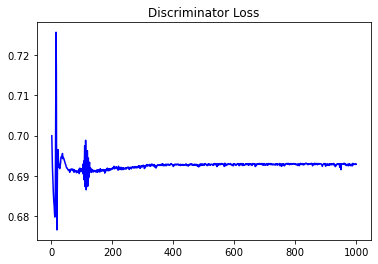

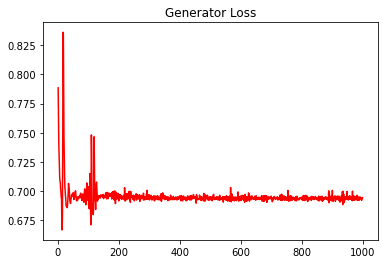

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2723543480422399


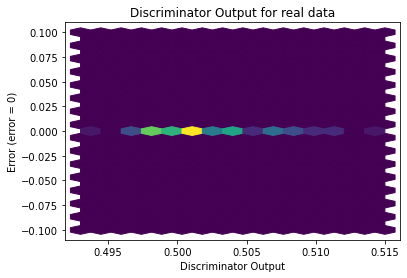

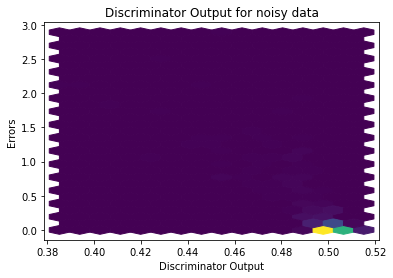

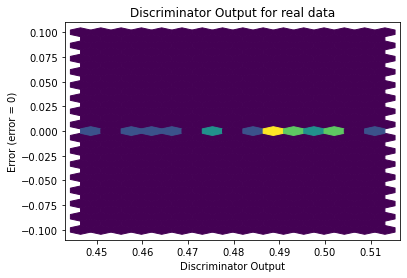

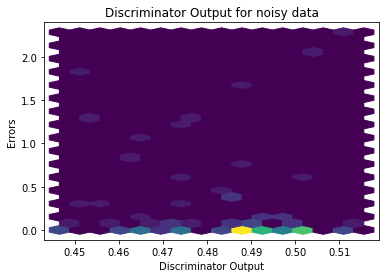

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


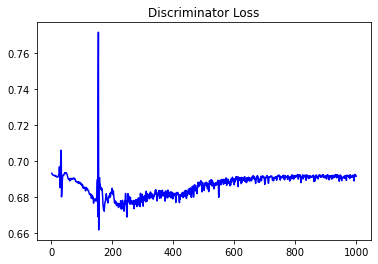

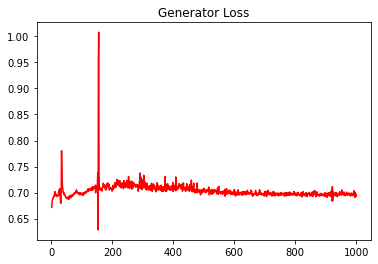

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2930225710342065


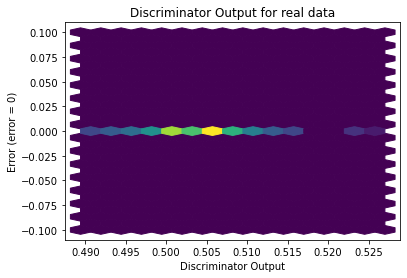

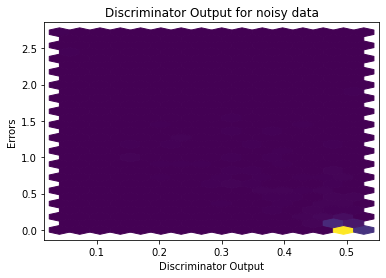

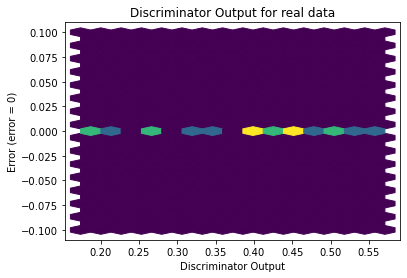

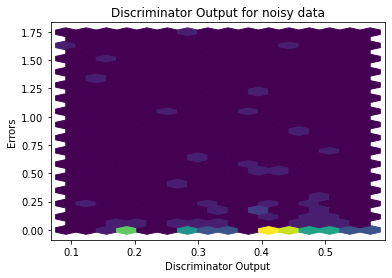

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1406]], requires_grad=True)
